<a href="https://colab.research.google.com/github/mishu-anik23/ML_playground/blob/master/practice_lin_regr_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# importing the libraries

import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

In [0]:
# Define a function to process the two datasets a/c to learning objective.


def prepare_country_stats(life_data, gdp_data):
    
    # filtering the data a/c to INEQUALITY criteria 'TOT'
    life_data = life_data[life_data["INEQUALITY"]=="TOT"]

    ## rearranging the data a/c to different inducator value for each country
    life_data = life_data.pivot(index="Country", columns="Indicator", values="Value")

    ## renaming one column name and arranging a/c to Country of the i/p gdp dataset 
    gdp_data.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_data.set_index("Country", inplace=True)
    
    ## merging the two datasets and sorting by GDP value
    full_country_stats = pd.merge(left=life_data, right=gdp_data,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)

    ## return the final datasets after removing some indexes.
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))

    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [0]:
# Ploting function of Life Satisfaction Based on GDP for given Country name.

def plot_prediction(model, country):
  new_gdp = data_gdp_per_capita.loc[country]["GDP per capita"]
  new_pred = model.predict([[new_gdp]])[0][0]
  
  X=np.linspace(0, 60000, 1000)
  plt.plot(X, t0 + t1*X, "r")
  plt.axis([0, 60000, 4.5, 9.2])
  plt.text(35000, 5.7, r"$\theta_0 = {:.3f}$".format(intercept), fontsize=12, color="g")
  plt.text(35000, 5.4, r"$\theta_1 = {:.3e}$".format(coeff), fontsize=12, color="g")
  plt.plot([new_gdp, new_gdp], [0, new_pred], "r--")
  plt.text(35000, 5.0, r"Prediction = {:.3f}".format(new_pred), fontsize=12, color="r")
  plt.plot(new_gdp, new_pred, "ro")

In [0]:
# Load the data
data_better_life = pd.read_csv("better_life_index.csv", thousands=',')
data_gdp_per_capita = pd.read_csv("gdp_per_capita.csv",thousands=',', delimiter=';',
                             encoding='latin1', na_values="n/a")

#print(data_better_life)
#print(data_gdp_per_capita)

In [0]:
# Prepare the data
country_stats = prepare_country_stats(data_better_life, data_gdp_per_capita)

# np.c_ Translates slice objects to concatenation along the second axis.
training = np.c_[country_stats["GDP per capita"]]
label = np.c_[country_stats["Life satisfaction"]]

In [412]:
# Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(training, label)

intercept, coeff = model.intercept_[0], model.coef_[0][0]
intercept, coeff


(5.382933241430951, 3.8823699577965094e-05)

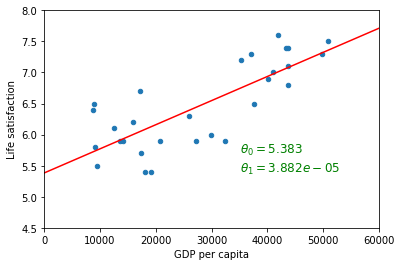

In [413]:
# Visualize the data with appropriate Cost function.

country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')

plt.axis([0, 60000, 4.5, 8])
X=np.linspace(0, 60000, 1000)
plt.plot(X, t0 + t1*X, "r")
plt.text(35000, 5.7, r"$\theta_0 = {:.3f}$".format(intercept), fontsize=12, color="g")
plt.text(35000, 5.4, r"$\theta_1 = {:.3e}$".format(coeff), fontsize=12, color="g")
plt.show()

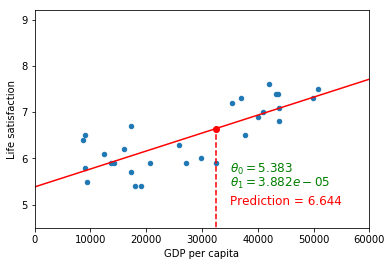

In [414]:
# Visualize a prediction for a new country based on GDP

country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plot_prediction(model=model, country="Japan")